In [140]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [141]:
#let X be the training data
X=pd.read_csv("./cbb-data/cbb.csv")

#remove 2019 data bc we gonna test on that
X=X[X.YEAR != 2019]
X

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
5,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,Texas A&M,SEC,37,28,113.0,92.2,0.9126,51.2,47.4,17.4,...,32.3,51.3,45.6,34.1,33.3,68.4,5.2,S16,3.0,2016
1751,Kentucky,SEC,37,26,115.8,95.6,0.9000,51.8,46.8,18.6,...,32.3,51.2,48.0,35.7,30.1,70.0,4.3,S16,5.0,2018
1752,Texas A&M,SEC,35,22,111.2,94.7,0.8640,51.4,46.9,19.2,...,27.6,52.5,45.7,32.9,32.6,70.3,1.9,S16,7.0,2018
1755,Gonzaga,WCC,35,27,117.4,94.5,0.9238,55.2,44.8,17.1,...,28.1,54.3,44.4,37.8,30.3,68.2,2.1,S16,11.0,2016


In [142]:
#Drop teams that don't make the tournament
X=X.dropna()

#Drop Teams that lose their play in game
X=X[X.POSTSEASON != 'R68']

X

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
5,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,Texas A&M,SEC,37,28,113.0,92.2,0.9126,51.2,47.4,17.4,...,32.3,51.3,45.6,34.1,33.3,68.4,5.2,S16,3.0,2016
1751,Kentucky,SEC,37,26,115.8,95.6,0.9000,51.8,46.8,18.6,...,32.3,51.2,48.0,35.7,30.1,70.0,4.3,S16,5.0,2018
1752,Texas A&M,SEC,35,22,111.2,94.7,0.8640,51.4,46.9,19.2,...,27.6,52.5,45.7,32.9,32.6,70.3,1.9,S16,7.0,2018
1755,Gonzaga,WCC,35,27,117.4,94.5,0.9238,55.2,44.8,17.1,...,28.1,54.3,44.4,37.8,30.3,68.2,2.1,S16,11.0,2016


In [143]:
#Map Postseason columns to tournament games won
X=X.replace({'Champions': 6, '2ND': 5, 'F4':4, 'E8':3, 'S16':2,  'R32':1, 'R64':0})
X

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,5,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,5,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,5,3.0,2018
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,5,1.0,2017
5,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,6,1.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,Texas A&M,SEC,37,28,113.0,92.2,0.9126,51.2,47.4,17.4,...,32.3,51.3,45.6,34.1,33.3,68.4,5.2,2,3.0,2016
1751,Kentucky,SEC,37,26,115.8,95.6,0.9000,51.8,46.8,18.6,...,32.3,51.2,48.0,35.7,30.1,70.0,4.3,2,5.0,2018
1752,Texas A&M,SEC,35,22,111.2,94.7,0.8640,51.4,46.9,19.2,...,27.6,52.5,45.7,32.9,32.6,70.3,1.9,2,7.0,2018
1755,Gonzaga,WCC,35,27,117.4,94.5,0.9238,55.2,44.8,17.1,...,28.1,54.3,44.4,37.8,30.3,68.2,2.1,2,11.0,2016


In [144]:
#Save column of labels
y=X.get("POSTSEASON")

In [145]:
# correct the game values
X['G']=X['G']-X['POSTSEASON']-1
X['W']=X['W']-X['POSTSEASON']

indices= X[X['POSTSEASON']==6].index.values

for i in indices:
    X.at[i, 'G']=X.at[i, 'G']+1

#remove the column of post season and string features
X=X.drop(columns=['POSTSEASON', 'TEAM', 'CONF', 'YEAR'])

#normalized data
X=(X-X.mean())/X.std()

X

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
0,1.073784,1.203005,1.738647,-0.380921,0.923977,0.053358,0.080170,-1.105545,-0.280190,2.174888,0.457825,-0.842832,-0.429244,0.838977,-0.703311,-1.442002,1.292424,1.105488,1.440923,-1.621463
1,1.073784,2.071339,2.648667,-0.644477,1.066011,0.842104,-0.088401,-2.846491,-1.342836,0.139767,-1.746953,-0.044233,-1.774861,1.132211,-0.669114,0.074353,1.914433,-2.563751,2.000958,-1.621463
2,1.073784,1.203005,0.342238,-1.293231,0.826368,0.519435,-0.088401,-1.917986,0.295410,-1.422070,-1.326995,-1.170462,-0.496525,1.099630,0.049025,-0.444400,-0.142980,-0.610769,1.088308,-1.188847
4,0.412994,2.360783,0.875698,-2.124446,1.047240,1.487442,-2.869839,-0.641293,-0.767236,-0.357182,-0.872041,0.529119,-1.017952,1.620936,-2.276378,0.752722,-2.152545,1.046306,1.254245,-1.621463
5,0.412994,1.492449,2.036757,-1.252684,1.069765,1.487442,-0.594117,-0.583262,-0.103082,1.015342,0.527818,0.692935,-1.522558,1.490609,-0.121961,0.952242,-1.004222,-0.462816,1.876506,-1.621463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,1.073784,0.624115,0.122578,-0.928307,0.670570,-0.448571,-0.214830,0.055085,0.826733,0.778700,0.177853,0.344828,-0.109660,-0.008145,-0.361340,-0.883345,-0.095133,0.128997,0.735694,-1.188847
1751,1.073784,0.045226,0.561898,-0.239006,0.591732,-0.233459,-0.467688,0.751463,-0.900067,0.991678,0.807790,1.552964,-0.109660,-0.040727,0.459390,-0.244880,-1.626231,0.602447,0.549016,-0.756232
1752,-0.247796,-1.112553,-0.159842,-0.421468,0.366481,-0.376867,-0.425545,1.099652,-1.564221,0.565722,-0.487080,-0.904262,-0.900210,0.382834,-0.327143,-1.362194,-0.430061,0.691219,0.051207,-0.323617
1755,-0.247796,0.334670,0.812938,-0.462015,0.740648,0.985513,-1.310548,-0.119010,-1.652775,0.139767,-0.942034,-0.412817,-0.816109,0.969303,-0.771705,0.593105,-1.530537,0.069815,0.092691,0.541614


In [146]:
#random classifier, and fit
randTree = RandomForestRegressor(min_samples_split=20, random_state=5);
randTree.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

In [147]:
#Now that training data X has been trained, format 2019 data
TEST=pd.read_csv("./cbb-data/cbb19.csv")
TEST=TEST.dropna()
TEST=TEST[TEST.POSTSEASON != 'R68']
TEST=TEST.replace({'Champions': 6, '2ND': 5, 'F4':4, 'E8':3, 'S16':2,  'R32':1, 'R64':0})

TEST['G']=TEST['G']-TEST['POSTSEASON']-1
TEST['W']=TEST['W']-TEST['POSTSEASON']

indices= TEST[TEST['POSTSEASON']==6].index.values

for i in indices:
    TEST.at[i, 'G']=TEST.at[i, 'G']+1

#get team name info to print
teams=TEST.get("TEAM")

labels=TEST.get("POSTSEASON")

#drop string columms
TEST=TEST.drop(columns=['POSTSEASON', 'TEAM', 'CONF'])

#standardize/normalize
TEST=(TEST-TEST.mean())/TEST.std()



TEST

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
0,0.266300,1.528551,2.042572,-1.132484,1.073843,2.460166,-1.566239,-1.786817,0.010948,0.338659,-0.258338,0.390565,-1.264927,3.016431,-1.347685,0.262195,-1.161525,1.304614,0.951017,-1.614218
1,-0.474709,1.244170,1.972384,-1.132484,1.068618,0.941607,-1.361502,-1.929228,-0.645904,0.058170,-0.736583,-1.103902,-1.164796,0.040748,-0.543228,1.656936,-1.875394,-2.729147,1.772165,-1.614218
2,1.007309,1.244170,1.252960,-1.260798,1.009833,0.302213,-1.238660,0.064530,0.186108,1.384121,0.663992,-0.115625,-1.740545,1.879653,-0.788062,-2.135016,-1.399481,1.875766,1.792193,-1.614218
3,0.266300,0.675406,1.463523,-0.857526,0.968031,0.022479,0.358290,-0.149087,-0.295583,1.307624,-1.624753,-0.838755,-0.639113,-0.092990,0.226254,0.218609,0.313805,2.732493,1.551857,-1.614218
4,1.007309,0.959788,0.498442,-1.920698,1.022243,-0.497028,-1.607186,-2.498873,-0.426954,-1.395277,-0.941545,-1.489571,-1.715513,-0.193294,-1.032897,-0.653104,-1.780211,-0.872903,1.391633,-1.398989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,-2.697736,0.675406,-1.905487,0.847215,-1.982937,-0.377142,0.726817,-0.077881,1.893923,-0.808798,0.322389,0.077209,1.839111,-0.962291,0.890806,0.872394,0.218622,-0.444539,-0.971671,1.398989
62,-1.215718,-0.462120,-1.010593,1.928718,-2.121406,0.781758,1.013449,-0.220292,-0.339373,-1.981755,1.278879,1.113695,-0.839373,0.408529,1.100664,0.872394,0.408988,0.126613,-1.452343,1.614218
63,-0.474709,-1.599647,-0.905312,2.368651,-2.436881,0.262251,2.282819,-1.217172,-2.003398,-2.415239,-0.565781,-0.356669,-1.114731,-0.092990,1.870145,0.436537,1.979500,-0.658721,-2.173351,1.614218
64,-0.474709,-2.168410,-1.150969,2.331990,-2.649158,0.062441,1.750502,-0.077881,-0.208003,-1.293281,1.073917,0.752130,-0.614080,0.274791,1.065688,-0.260833,1.789134,1.268917,-2.533854,1.614218


In [148]:
#probabilies for each Class

teams=teams.to_numpy()

Gonzaga 4.557290395729713
Virginia 4.615669048984
Duke 3.3676946048167684
North Carolina 2.653931732484411
Michigan 3.411580227902868
Michigan St. 2.6715325615345864
Kentucky 2.169553191066556
Tennessee 2.6195617766263193
Texas Tech 4.217459245721264
Purdue 2.1846531786086842
Houston 1.516974203422908
LSU 1.552234219156585
Virginia Tech 1.9981673631226737
Kansas St. 1.6729100350263673
Florida St. 1.6949369638452303
Kansas 1.5581019882539167
Auburn 1.9595064288955222
Wisconsin 1.7218523846542915
Mississippi St. 0.8472946164538476
Marquette 0.6295310262671641
Iowa St. 1.4544514531553039
Maryland 0.7807060692859328
Buffalo 1.4081640996931126
Villanova 0.40527956659160713
Louisville 0.8152462875249098
Wofford 0.9227131001631043
Cincinnati 1.317288734326177
Nevada 0.9297341590004106
VCU 1.2890993775725057
Syracuse 0.9074713463888758
Mississippi 0.39514311318018364
Utah St. 0.4038978013318115
UCF 0.93497526467559
Oklahoma 0.803024022905787
Baylor 0.4014046788369238
Washington 0.5581690794247

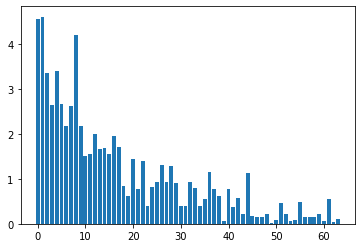

In [149]:
#get predicted outcomes for each team and print!
outcomes=randTree.predict(TEST)

for i in range(len(teams)):
    print(teams[i], outcomes[i])

wins=plt.bar([x for x in range(len(outcomes))], outcomes)

In [150]:
#featureImportances for 19
importances19 = randTree.feature_importances_

<BarContainer object of 20 artists>

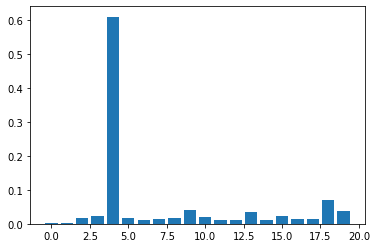

In [151]:
#normalize feature importances. and display
#importances19 = importances19/max(importances19)

features=plt.bar([x for x in range(len(importances19))], importances19)
features

In [152]:


#from sci learn metrics
print('Mean squared error: %.2f'
      %mean_squared_error(labels, outcomes)) 
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(labels, outcomes))

R^2 of prediction for 2019 tournament 0.6725444818477213
Mean squared error: 0.59
Coefficient of determination: 0.67
